Accuracy: 0.9160


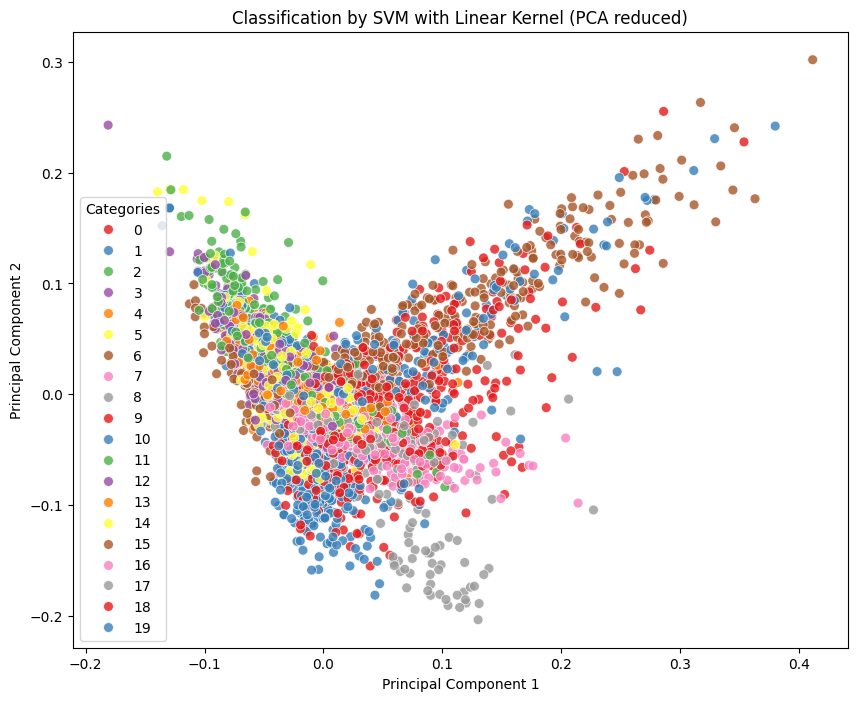

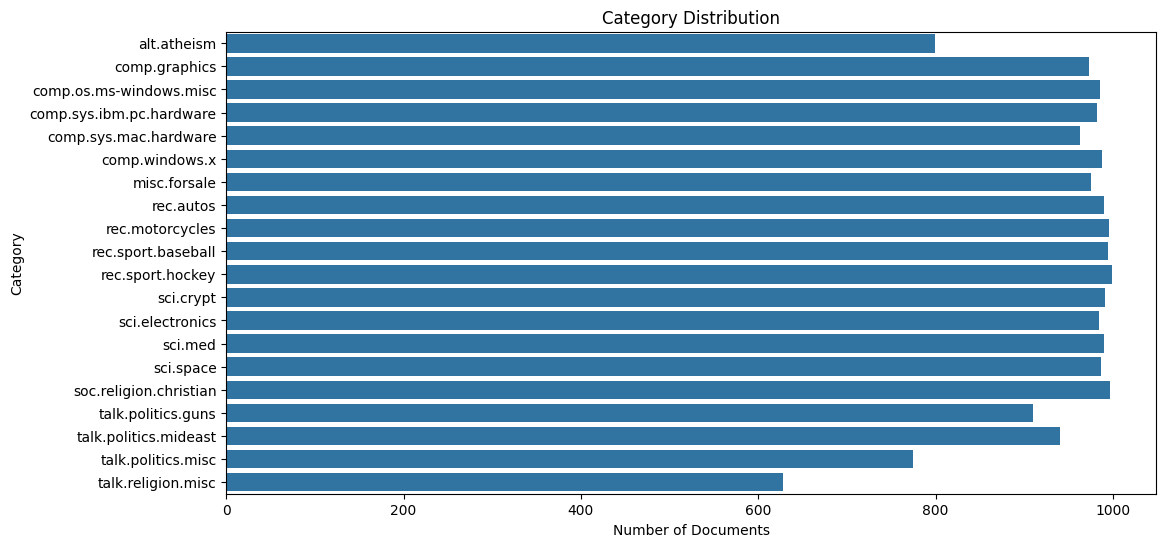

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', data_home='./data')
X, y = newsgroups.data, newsgroups.target

# Step 2: Preprocess the data (TF-IDF transformation)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X_tfidf = vectorizer.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Evaluate the model and report its accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


# Draw a classification diagram using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test.toarray())

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_pred, palette='Set1', s=50, alpha=0.8)
plt.title('Classification by SVM with Linear Kernel (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Categories', loc='best')
plt.show()

# Draw another classification diagram using the categories
category_distribution = np.bincount(newsgroups.target)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution , y=newsgroups.target_names)
plt.title('Category Distribution')
plt.xlabel('Number of Documents')
plt.ylabel('Category')
plt.show()